In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import pandas as pd
import quandl as Quandl
import wbdata as wb
from scipy import stats
import runProcs
%matplotlib inline

In [2]:
# 0. Preliminaries

# 0.1 general plot settings

font = {'weight' : 'bold',
        'size'   : 15}
axes={'labelweight' : 'bold'}
plt.rc('font', **font)
plt.rc('axes', **axes)
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'

In [3]:
# 1. Import country codes and organize

# 1.1 Import country codes and names from the country_codes file from Quandl's WB WDI documentation: https://www.quandl.com/data/WWDI/documentation/documentation
countryCodes = {}

try:
    text_file = open('country_codes', 'r')
    lines = text_file.readlines()
    for line in lines:
        split = line.split('|')
        if len(split)>1:
            if len(split[1])==4:
                countryCodes[split[0]] = split[1][:-1]
except:
    countryCodes = {
 'Afghanistan': 'AFG',
 'Africa': 'AFR',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Arab World': 'ARB',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas, The': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Brunei Darussalam': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Caribbean small states': 'CSS',
 'Cayman Islands': 'CYM',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Channel Islands': 'CHI',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Comoros': 'COM',
 'Congo, Dem. Rep.': 'COD',
 'Congo, Rep.': 'COG',
 'Costa Rica': 'CRI',
 "Cote d'Ivoire": 'CIV',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Curacao': 'CUW',
 'Cyprus': 'CYP',
 'Czech Republic': 'CZE',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Dominica': 'DMA',
 'Dominican Republic': 'DOM',
 'East Asia & Pacific (all income levels)': 'EAS',
 'East Asia & Pacific (developing only)': 'EAP',
 'East Asia and the Pacific (IFC classification)': 'CEA',
 'Ecuador': 'ECU',
 'Egypt, Arab Rep.': 'EGY',
 'El Salvador': 'SLV',
 'Equatorial Guinea': 'GNQ',
 'Eritrea': 'ERI',
 'Estonia': 'EST',
 'Ethiopia': 'ETH',
 'Euro area': 'EMU',
 'Europe & Central Asia (all income levels)': 'ECS',
 'Europe & Central Asia (developing only)': 'ECA',
 'Europe and Central Asia (IFC classification)': 'CEU',
 'European Union': 'EUU',
 'Faeroe Islands': 'FRO',
 'Fiji': 'FJI',
 'Finland': 'FIN',
 'France': 'FRA',
 'French Polynesia': 'PYF',
 'Gabon': 'GAB',
 'Gambia, The': 'GMB',
 'Georgia': 'GEO',
 'Germany': 'DEU',
 'Ghana': 'GHA',
 'Greece': 'GRC',
 'Greenland': 'GRL',
 'Grenada': 'GRD',
 'Guam': 'GUM',
 'Guatemala': 'GTM',
 'Guinea': 'GIN',
 'Guinea-Bissau': 'GNB',
 'Guyana': 'GUY',
 'Haiti': 'HTI',
 'Heavily indebted poor countries (HIPC)': 'HPC',
 'High income': 'HIC',
 'High income: OECD': 'OEC',
 'High income: nonOECD': 'NOC',
 'Honduras': 'HND',
 'Hong Kong SAR, China': 'HKG',
 'Hungary': 'HUN',
 'Iceland': 'ISL',
 'India': 'IND',
 'Indonesia': 'IDN',
 'Iran, Islamic Rep.': 'IRN',
 'Iraq': 'IRQ',
 'Ireland': 'IRL',
 'Isle of Man': 'IMN',
 'Israel': 'ISR',
 'Italy': 'ITA',
 'Jamaica': 'JAM',
 'Japan': 'JPN',
 'Jordan': 'JOR',
 'Kazakhstan': 'KAZ',
 'Kenya': 'KEN',
 'Kiribati': 'KIR',
 'Korea, Dem. Rep.': 'PRK',
 'Korea, Rep.': 'KOR',
 'Kosovo': 'KSV',
 'Kuwait': 'KWT',
 'Kyrgyz Republic': 'KGZ',
 'Lao PDR': 'LAO',
 'Latin America & Caribbean (all income levels)': 'LCN',
 'Latin America & Caribbean (developing only)': 'LAC',
 'Latin America and the Caribbean (IFC classification)': 'CLA',
 'Latvia': 'LVA',
 'Least developed countries: UN classification': 'LDC',
 'Lebanon': 'LBN',
 'Lesotho': 'LSO',
 'Liberia': 'LBR',
 'Libya': 'LBY',
 'Liechtenstein': 'LIE',
 'Lithuania': 'LTU',
 'Low & middle income': 'LMY',
 'Low income': 'LIC',
 'Lower middle income': 'LMC',
 'Luxembourg': 'LUX',
 'Macao SAR, China': 'MAC',
 'Macedonia, FYR': 'MKD',
 'Madagascar': 'MDG',
 'Malawi': 'MWI',
 'Malaysia': 'MYS',
 'Maldives': 'MDV',
 'Mali': 'MLI',
 'Malta': 'MLT',
 'Marshall Islands': 'MHL',
 'Mauritania': 'MRT',
 'Mauritius': 'MUS',
 'Mexico': 'MEX',
 'Micronesia, Fed. Sts.': 'FSM',
 'Middle East & North Africa (all income levels)': 'MEA',
 'Middle East & North Africa (developing only)': 'MNA',
 'Middle East and North Africa (IFC classification)': 'CME',
 'Middle income': 'MIC',
 'Moldova': 'MDA',
 'Monaco': 'MCO',
 'Mongolia': 'MNG',
 'Montenegro': 'MNE',
 'Morocco': 'MAR',
 'Mozambique': 'MOZ',
 'Myanmar': 'MMR',
 'Namibia': 'NAM',
 'Nepal': 'NPL',
 'Netherlands': 'NLD',
 'New Caledonia': 'NCL',
 'New Zealand': 'NZL',
 'Nicaragua': 'NIC',
 'Niger': 'NER',
 'Nigeria': 'NGA',
 'North Africa': 'NAF',
 'North America': 'NAC',
 'Northern Mariana Islands': 'MNP',
 'Norway': 'NOR',
 'OECD members': 'OED',
 'Oman': 'OMN',
 'Other small states': 'OSS',
 'Pacific island small states': 'PSS',
 'Pakistan': 'PAK',
 'Palau': 'PLW',
 'Panama': 'PAN',
 'Papua New Guinea': 'PNG',
 'Paraguay': 'PRY',
 'Peru': 'PER',
 'Philippines': 'PHL',
 'Poland': 'POL',
 'Portugal': 'PRT',
 'Puerto Rico': 'PRI',
 'Qatar': 'QAT',
 'Romania': 'ROU',
 'Russian Federation': 'RUS',
 'Rwanda': 'RWA',
 'Samoa': 'WSM',
 'San Marino': 'SMR',
 'Sao Tome and Principe': 'STP',
 'Saudi Arabia': 'SAU',
 'Senegal': 'SEN',
 'Serbia': 'SRB',
 'Seychelles': 'SYC',
 'Sierra Leone': 'SLE',
 'Singapore': 'SGP',
 'Sint Maarten (Dutch part)': 'SXM',
 'Slovak Republic': 'SVK',
 'Slovenia': 'SVN',
 'Small states': 'SST',
 'Solomon Islands': 'SLB',
 'Somalia': 'SOM',
 'South Africa': 'ZAF',
 'South Asia': 'SAS',
 'South Asia (IFC classification)': 'CSA',
 'South Sudan': 'SSD',
 'Spain': 'ESP',
 'Sri Lanka': 'LKA',
 'St. Kitts and Nevis': 'KNA',
 'St. Lucia': 'LCA',
 'St. Martin (French part)': 'MAF',
 'St. Vincent and the Grenadines': 'VCT',
 'Sub-Saharan Africa (IFC classification)': 'CAA',
 'Sub-Saharan Africa (all income levels)': 'SSF',
 'Sub-Saharan Africa (developing only)': 'SSA',
 'Sub-Saharan Africa excluding South Africa': 'SXZ',
 'Sub-Saharan Africa excluding South Africa and Nigeria': 'XZN',
 'Sudan': 'SDN',
 'Suriname': 'SUR',
 'Swaziland': 'SWZ',
 'Sweden': 'SWE',
 'Switzerland': 'CHE',
 'Syrian Arab Republic': 'SYR',
 'Tajikistan': 'TJK',
 'Tanzania': 'TZA',
 'Thailand': 'THA',
 'Timor-Leste': 'TLS',
 'Togo': 'TGO',
 'Tonga': 'TON',
 'Trinidad and Tobago': 'TTO',
 'Tunisia': 'TUN',
 'Turkey': 'TUR',
 'Turkmenistan': 'TKM',
 'Turks and Caicos Islands': 'TCA',
 'Tuvalu': 'TUV',
 'Uganda': 'UGA',
 'Ukraine': 'UKR',
 'United Arab Emirates': 'ARE',
 'United Kingdom': 'GBR',
 'United States': 'USA',
 'Upper middle income': 'UMC',
 'Uruguay': 'URY',
 'Uzbekistan': 'UZB',
 'Vanuatu': 'VUT',
 'Venezuela, RB': 'VEN',
 'Vietnam': 'VNM',
 'Virgin Islands (U.S.)': 'VIR',
 'West Bank and Gaza': 'PSE',
 'World': 'WLD',
 'Yemen, Rep.': 'YEM',
 'Zambia': 'ZMB',
 'Zimbabwe': 'ZWE'}
    
        
#1.2 Use wbdata to get lists of country codes by income groups
countriesIncomeAll =  [i['id'] for i in wb.get_country(incomelevel=['LIC','MIC','HIC'])]
countriesIncomeH = [i['id'] for i in wb.get_country(incomelevel=['HIC'])]
countriesIncomeM = [i['id'] for i in wb.get_country(incomelevel=['MIC'])]
countriesIncomeL = [i['id'] for i in wb.get_country(incomelevel=['LIC'])]

countriesIncomeOecd = ['AUS','CAN','CHL','CZE','DNK','EST','HUN','ISL','ISR','JPN'
                       ,'KOR','NZL','NOR''POL','SVK','SVN','SWE','CHE','USA']

# Figures: money, prices, and output

regression coefficient: 0.98


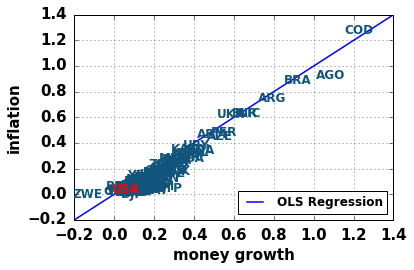

In [4]:
# 4. Graph of quantity theory data without exchange or interest rates

# 4.0 Import data

quantity_theory_data = pd.read_csv('../csv/quantity_theory_data.csv')
quantity_theory_data_L = pd.read_csv('../csv/quantity_theory_data_L.csv')
quantity_theory_data_M = pd.read_csv('../csv/quantity_theory_data_M.csv')
quantity_theory_data_H = pd.read_csv('../csv/quantity_theory_data_H.csv')
quantity_theory_data_oecd = pd.read_csv('../csv/quantity_theory_data_oecd.csv')


# 4.1 Money growth inflation with country codes
m = quantity_theory_data['money growth']
p = quantity_theory_data['inflation']
y = quantity_theory_data['gdp growth']
codes = quantity_theory_data['iso code']


a_p, b_p, r_p, p_value, std_err = stats.linregress(m,p)
xVals = np.arange(-10,10)
p_pred = b_p + a_p*xVals

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(p_pred,p_pred,lw=1.5,label='OLS Regression')
ax1.legend(loc='lower right',fontsize=12)
for i in range(len(codes)):
    if codes[i] =='USA':
        usaIndex = i
#         plt.text(m[i], p[i], codes[i], color='red',fontsize=12, clip_on=True,horizontalalignment='center',verticalalignment='center',alpha = 1)
    else:
        plt.text(m[i], p[i], codes[i], color="#11557c",fontsize=12, clip_on=True,horizontalalignment='center',verticalalignment='center',alpha = 1)
plt.text(m[usaIndex], p[usaIndex], codes[usaIndex], color='red',fontsize=12, clip_on=True,horizontalalignment='center',verticalalignment='center',alpha = 1)
ax1.axis([-0.2, 1.4, -0.2, 1.4])
ax1.set_xlabel('money growth')
ax1.set_ylabel('inflation')
plt.grid()

plt.tight_layout()
plt.savefig('../png/fig_money_inflation_coded.png',bbox_inches='tight',dpi=120)


print('regression coefficient:',np.round(a_p,2))

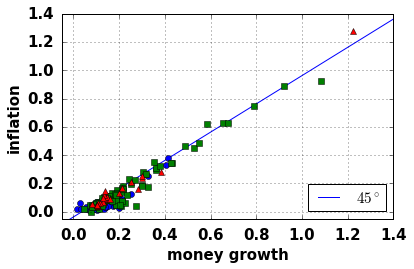

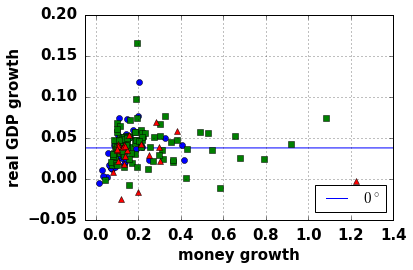

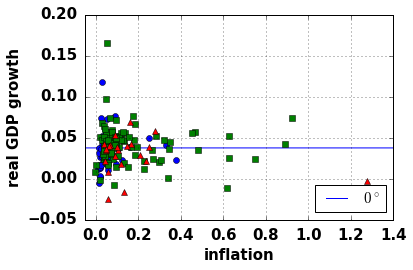

In [5]:
# 4.2 Money growth and inflation

xmin = -0.05
xmax = 1.4
ymin = -0.05
ymax = 1.4

x45 = np.arange(xmin,xmax,0.001)
y45 = x45 - np.mean(quantity_theory_data['gdp growth'])

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x45,y45)
ax1.plot(quantity_theory_data_H['money growth'],quantity_theory_data_H['inflation'],'bo')
ax1.plot(quantity_theory_data_M['money growth'],quantity_theory_data_M['inflation'],'gs')
ax1.plot(quantity_theory_data_L['money growth'],quantity_theory_data_L['inflation'],'r^')
plt.grid(True)
ax1.set_xlabel('money growth')
ax1.set_ylabel('inflation')
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,ymax])

plt.legend(['$45^\circ$'],loc='lower right',fontsize='15')

plt.tight_layout()
plt.savefig('../png/fig_money_inflation.png',bbox_inches='tight',dpi=120)

# 4.3 Money growth and real gdp growth

xmin = -0.05
xmax = 1.4
ymin = -0.05
ymax = .2

x0 = np.arange(xmin,xmax,0.001)
y0 = x0*0 + np.mean(quantity_theory_data['gdp growth'])

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x0,y0)
plt.plot(quantity_theory_data_H['money growth'],quantity_theory_data_H['gdp growth'],'bo')
plt.plot(quantity_theory_data_M['money growth'],quantity_theory_data_M['gdp growth'],'gs')
plt.plot(quantity_theory_data_L['money growth'],quantity_theory_data_L['gdp growth'],'r^')
plt.grid(True)
# ax1.set_title('Money growth and real GDP growth',fontsize=15)
ax1.set_xlabel('money growth')
ax1.set_ylabel('real GDP growth')
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,ymax])
plt.legend(['$0^\circ$'],loc='lower right',fontsize='15')

plt.tight_layout()
plt.savefig('../png/fig_money_gdp.png',bbox_inches='tight',dpi=120)

# 4.4 Money growth and real gdp growth

xmin = -0.05
xmax = 1.4
ymin = -0.05
ymax = .2

x0 = np.arange(xmin,xmax,0.001)
y0 = x0*0 + np.mean(quantity_theory_data['gdp growth'])

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x0,y0)
plt.plot(quantity_theory_data_H['inflation'],quantity_theory_data_H['gdp growth'],'bo')
plt.plot(quantity_theory_data_M['inflation'],quantity_theory_data_M['gdp growth'],'gs')
plt.plot(quantity_theory_data_L['inflation'],quantity_theory_data_L['gdp growth'],'r^')
plt.grid(True)
# ax1.set_title('Inflation and real GDP growth',fontsize=15)
ax1.set_xlabel('inflation')
ax1.set_ylabel('real GDP growth')
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,ymax])
plt.legend(['$0^\circ$'],loc='lower right',fontsize='15')

plt.tight_layout()
plt.savefig('../png/fig_inflation_gdp.png',bbox_inches='tight',dpi=120)

In [6]:
# 5. Make tex files for figures

# 5.0 Money growth and inflation with codes
nf = open('../tex/figure_money_inflation_coded.tex', 'w')
nf.write('\\begin{figure}[h]\n')
nf.write('\\caption{\\label{fig:money_inflation_coded} \\textbf{Money growth and deflator inflation for '),nf.write(str(len(quantity_theory_data))),nf.write(' countries.} High-income countries: blue circles, medium-income: green squares, and low-income: red triangles. {\\tiny Source: Quandl, World Development Indicators, World Bank}}\n')
nf.write('\\hspace*{-.5cm}\\includegraphics[height = 7.cm]{../png/fig_moneyInflation_coded.png}\n')
nf.write('\\end{figure}')
nf.close()

# 5.1 Money growth and inflation
nf = open('../tex/figure_money_inflation.tex', 'w')
nf.write('\\begin{figure}[h]\n')
nf.write('\\caption{\\label{fig:money_inflation} \\textbf{Money growth and deflator inflation for '),nf.write(str(len(quantity_theory_data))),nf.write(' countries.} High-income countries: blue circles, medium-income: green squares, and low-income: red triangles. {\\tiny Source: Quandl, World Development Indicators, World Bank}}\n')
nf.write('\\hspace*{-.5cm}\\includegraphics[height = 7.cm]{../png/fig_money_inflation.png}\n')
nf.write('\\end{figure}')
nf.close()

# 5.2 Inflation and real GDP
nf = open('../tex/figure_inflation_gdp.tex', 'w')
nf.write('\\begin{figure}[h]\n')
nf.write('\\caption{\\label{fig:money_gdp} \\textbf{Deflator inflation and real GDP growth for '),nf.write(str(len(quantity_theory_data))),nf.write(' countries.} High-income countries: blue circles, medium-income: green squares, and low-income: red triangles. {\\tiny Source: Quandl, World Development Indicators, World Bank}}\n')
nf.write('\\hspace*{-.5cm}\\includegraphics[height = 7.cm]{../png/fig_inflation_gdp.png}\n')
nf.write('\\end{figure}')
nf.close()

# 5.3 Inflation and real GDP
nf = open('../tex/figure_money_gdp.tex', 'w')
nf.write('\\begin{figure}[h]\n')
nf.write('\\caption{\\label{fig:money_gdp} \\textbf{Money growth and real GDP growth for '),nf.write(str(len(quantity_theory_data))),nf.write(' countries.} High-income countries: blue circles, medium-income: green squares, and low-income: red triangles. {\\tiny Source: Quandl, World Development Indicators, World Bank}}\n')
nf.write('\\hspace*{-.5cm}\\includegraphics[height = 7.cm]{../png/fig_money_gdp.png}\n')
nf.write('\\end{figure}')
nf.close()

In [7]:
# 6. Correlations
print(quantity_theory_data[['money growth','inflation','gdp growth']].corr())
print(quantity_theory_data_H[['money growth','inflation','gdp growth']].corr())
print(quantity_theory_data_M[['money growth','inflation','gdp growth']].corr())
print(quantity_theory_data_L[['money growth','inflation','gdp growth']].corr())
print(quantity_theory_data_oecd[['money growth','inflation','gdp growth']].corr())

              money growth  inflation  gdp growth
money growth      1.000000   0.972198    0.074059
inflation         0.972198   1.000000   -0.048675
gdp growth        0.074059  -0.048675    1.000000
              money growth  inflation  gdp growth
money growth      1.000000   0.891177    0.399714
inflation         0.891177   1.000000    0.100920
gdp growth        0.399714   0.100920    1.000000
              money growth  inflation  gdp growth
money growth      1.000000   0.971113    0.054148
inflation         0.971113   1.000000   -0.060925
gdp growth        0.054148  -0.060925    1.000000
              money growth  inflation  gdp growth
money growth      1.000000   0.992717   -0.196303
inflation         0.992717   1.000000   -0.240224
gdp growth       -0.196303  -0.240224    1.000000
              money growth  inflation  gdp growth
money growth      1.000000   0.947452    0.425773
inflation         0.947452   1.000000    0.313998
gdp growth        0.425773   0.313998    1.000000


# Figures: money, prices, output, interest, and exchange rates

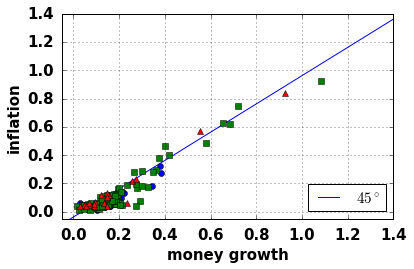

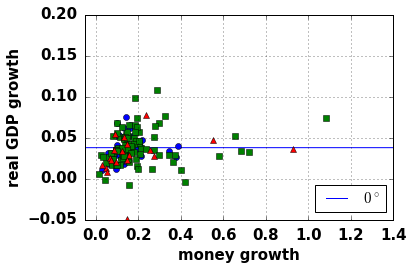

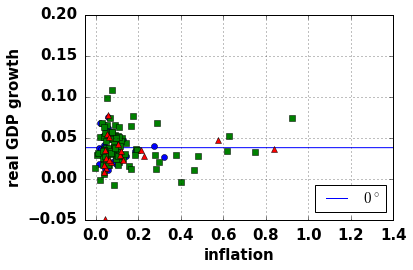

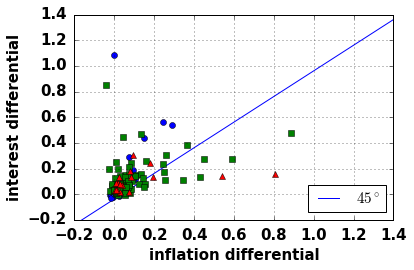

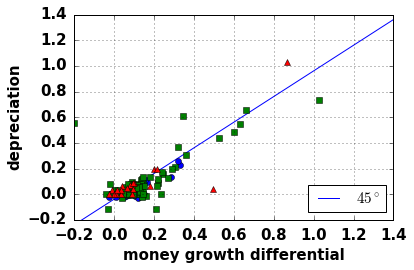

In [8]:
quantity_theory_data = pd.read_csv('../csv/quantity_theory_open_data.csv',index_col=0)
quantity_theory_data_L = pd.read_csv('../csv/quantity_theory_open_data_L.csv',index_col=0)
quantity_theory_data_M = pd.read_csv('../csv/quantity_theory_open_data_M.csv',index_col=0)
quantity_theory_data_H = pd.read_csv('../csv/quantity_theory_open_data_H.csv',index_col=0)
quantity_theory_data_oecd = pd.read_csv('../csv/quantity_theory_open_data_oecd.csv',index_col=0)


# 8.1 Money growth and inflation

xmin = -0.05
xmax = 1.4
ymin = -0.05
ymax = 1.4

x45 = np.arange(xmin,xmax,0.001)
y45 = x45 - np.mean(quantity_theory_data['gdp growth'])

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x45,y45)
ax1.plot(quantity_theory_data_H['money growth'],quantity_theory_data_H['inflation'],'bo')
ax1.plot(quantity_theory_data_M['money growth'],quantity_theory_data_M['inflation'],'gs')
ax1.plot(quantity_theory_data_L['money growth'],quantity_theory_data_L['inflation'],'r^')
plt.grid(True)
ax1.set_xlabel('money growth')
ax1.set_ylabel('inflation')
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,ymax])

plt.legend(['$45^\circ$'],loc='lower right',fontsize='15')

plt.tight_layout()
plt.savefig('../png/fig_money_inflation_open.png',bbox_inches='tight',dpi=120)

# 8.2 Money growth and real gdp growth

xmin = -0.05
xmax = 1.4
ymin = -0.05
ymax = .2

x0 = np.arange(xmin,xmax,0.001)
y0 = x0*0 + np.mean(quantity_theory_data['gdp growth'])

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x0,y0)
plt.plot(quantity_theory_data_H['money growth'],quantity_theory_data_H['gdp growth'],'bo')
plt.plot(quantity_theory_data_M['money growth'],quantity_theory_data_M['gdp growth'],'gs')
plt.plot(quantity_theory_data_L['money growth'],quantity_theory_data_L['gdp growth'],'r^')
plt.grid(True)
# ax1.set_title('Money growth and real GDP growth',fontsize=15)
ax1.set_xlabel('money growth')
ax1.set_ylabel('real GDP growth')
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,ymax])
plt.legend(['$0^\circ$'],loc='lower right',fontsize='15')

plt.tight_layout()
plt.savefig('../png/fig_money_gdp_open.png',bbox_inches='tight',dpi=120)

# 8.3 Money growth and real gdp growth

xmin = -0.05
xmax = 1.4
ymin = -0.05
ymax = .2

x0 = np.arange(xmin,xmax,0.001)
y0 = x0*0 + np.mean(quantity_theory_data['gdp growth'])

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x0,y0)
plt.plot(quantity_theory_data_H['inflation'],quantity_theory_data_H['gdp growth'],'bo')
plt.plot(quantity_theory_data_M['inflation'],quantity_theory_data_M['gdp growth'],'gs')
plt.plot(quantity_theory_data_L['inflation'],quantity_theory_data_L['gdp growth'],'r^')
plt.grid(True)
# ax1.set_title('Inflation and real GDP growth',fontsize=15)
ax1.set_xlabel('inflation')
ax1.set_ylabel('real GDP growth')
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,ymax])
plt.legend(['$0^\circ$'],loc='lower right',fontsize='15')

plt.tight_layout()
plt.savefig('../png/fig_inflation_gdp_open.png',bbox_inches='tight',dpi=120)

# 8.4 Money growth differential depreciation

xmin = -0.2
xmax = 1.4
ymin = -0.2
ymax = 1.4

x45 = np.arange(xmin,xmax,0.001)
y45 = x45 - np.mean(quantity_theory_data['gdp growth'])

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x45,y45)
ax1.plot(quantity_theory_data_H['inflation']- quantity_theory_data['inflation'].loc['United States'],quantity_theory_data_H['nominal interest rate']- quantity_theory_data['nominal interest rate'].loc['United States'],'bo')
ax1.plot(quantity_theory_data_M['inflation']- quantity_theory_data['inflation'].loc['United States'],quantity_theory_data_M['nominal interest rate']- quantity_theory_data['nominal interest rate'].loc['United States'],'gs')
ax1.plot(quantity_theory_data_L['inflation']- quantity_theory_data['inflation'].loc['United States'],quantity_theory_data_L['nominal interest rate']- quantity_theory_data['nominal interest rate'].loc['United States'],'r^')
plt.grid(True)
ax1.set_xlabel('inflation differential')
ax1.set_ylabel('interest differential')
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,ymax])

plt.legend(['$45^\circ$'],loc='lower right',fontsize='15')

plt.tight_layout()
plt.savefig('../png/fig_inflation_interest_differentials_open.png',bbox_inches='tight',dpi=120)

# 8.5 Money growth differential depreciation

xmin = -0.2
xmax = 1.4
ymin = -0.2
ymax = 1.4

x45 = np.arange(xmin,xmax,0.001)
y45 = x45 - np.mean(quantity_theory_data['gdp growth'])

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x45,y45)
ax1.plot(quantity_theory_data_H['money growth']- quantity_theory_data['money growth'].loc['United States'],quantity_theory_data_H['exchange rate depreciation'],'bo')
ax1.plot(quantity_theory_data_M['money growth']- quantity_theory_data['money growth'].loc['United States'],quantity_theory_data_M['exchange rate depreciation'],'gs')
ax1.plot(quantity_theory_data_L['money growth']- quantity_theory_data['money growth'].loc['United States'],quantity_theory_data_L['exchange rate depreciation'],'r^')
plt.grid(True)
ax1.set_xlabel('money growth differential')
ax1.set_ylabel('depreciation')
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([ymin,ymax])

plt.legend(['$45^\circ$'],loc='lower right',fontsize='15')

plt.tight_layout()
plt.savefig('../png/fig_money_differential_depreciation_open.png',bbox_inches='tight',dpi=120)

In [9]:
# 9. Make tex files for figures

# 9.1 Money growth and inflation
nf = open('../tex/figure_money_inflation_open.tex', 'w')
nf.write('\\begin{figure}[h]\n')
nf.write('\\caption{\\label{fig:money_inflation_open} \\textbf{Money growth and deflator inflation for '),nf.write(str(len(quantity_theory_data))),nf.write(' countries.} High-income countries: blue circles, medium-income: green squares, and low-income: red triangles. {\\tiny Source: Quandl, World Development Indicators, World Bank}}\n')
nf.write('\\hspace*{-.5cm}\\includegraphics[height = 7.cm]{./png/fig_money_inflation_open.png}\n')
nf.write('\\end{figure}')
nf.close()

# 9.2 Inflation and real GDP
nf = open('../tex/figure_inflation_gdp_open.tex', 'w')
nf.write('\\begin{figure}[h]\n')
nf.write('\\caption{\\label{fig:inflation_gdp_open} \\textbf{Deflator inflation and real GDP growth for '),nf.write(str(len(quantity_theory_data))),nf.write(' countries.} High-income countries: blue circles, medium-income: green squares, and low-income: red triangles. {\\tiny Source: Quandl, World Development Indicators, World Bank}}\n')
nf.write('\\hspace*{-.5cm}\\includegraphics[height = 7.cm]{./png/fig_inflation_gdp_open.png}\n')
nf.write('\\end{figure}')
nf.close()

# 9.3 Inflation and real GDP
nf = open('../tex/figure_money_gdp_open.tex', 'w')
nf.write('\\begin{figure}[h]\n')
nf.write('\\caption{\\label{fig:money_gdp_open} \\textbf{Money growth and real GDP growth for '),nf.write(str(len(quantity_theory_data))),nf.write(' countries.} High-income countries: blue circles, medium-income: green squares, and low-income: red triangles. {\\tiny Source: Quandl, World Development Indicators, World Bank}}\n')
nf.write('\\hspace*{-.5cm}\\includegraphics[height = 7.cm]{./png/fig_money_gdp_open.png}\n')
nf.write('\\end{figure}')
nf.close()

# 9.4 Inflation and interest rate differentials
nf = open('../tex/figure_inflation_interest_differentials_open.tex', 'w')
nf.write('\\begin{figure}[h]\n')
nf.write('\\caption{\\label{fig:inflation_interest_differentials_open} \\textbf{Interest and inflation relative to US for '),nf.write(str(len(quantity_theory_data))),nf.write(' countries.} High-income countries: blue circles, medium-income: green squares, and low-income: red triangles. {\\tiny Source: Quandl, World Development Indicators, World Bank}}\n')
nf.write('\\hspace*{-.5cm}\\includegraphics[height = 7.cm]{./png/fig_inflation_interest_differentials_open.png}\n')
nf.write('\\end{figure}')
nf.close()

# 9.5 Money growth and exchange rate depreciation
nf = open('../tex/figure_money_differential_depreciation_open.tex', 'w')
nf.write('\\begin{figure}[h]\n')
nf.write('\\caption{\\label{fig:money_differential_depreciation_open} \\textbf{Money growth and depreciation for '),nf.write(str(len(quantity_theory_data))),nf.write(' countries.} High-income countries: blue circles, medium-income: green squares, and low-income: red triangles. {\\tiny Source: Quandl, World Development Indicators, World Bank}}\n')
nf.write('\\hspace*{-.5cm}\\includegraphics[height = 7.cm]{./png/fig_money_differential_depreciation_open.png}\n')
nf.write('\\end{figure}')
nf.close()

In [10]:
# 10. Correlations
print(quantity_theory_data[['money growth','inflation','gdp growth','nominal interest rate','exchange rate depreciation']].corr())
print(quantity_theory_data_H[['money growth','inflation','gdp growth','nominal interest rate','exchange rate depreciation']].corr())
print(quantity_theory_data_M[['money growth','inflation','gdp growth','nominal interest rate','exchange rate depreciation']].corr())
print(quantity_theory_data_L[['money growth','inflation','gdp growth','nominal interest rate','exchange rate depreciation']].corr())
print(quantity_theory_data_oecd[['money growth','inflation','gdp growth','nominal interest rate','exchange rate depreciation']].corr())

                            money growth  inflation  gdp growth  \
money growth                    1.000000   0.951015    0.140015   
inflation                       0.951015   1.000000   -0.008167   
gdp growth                      0.140015  -0.008167    1.000000   
nominal interest rate           0.315125   0.373417   -0.023252   
exchange rate depreciation      0.799027   0.864868   -0.053247   

                            nominal interest rate  exchange rate depreciation  
money growth                             0.315125                    0.799027  
inflation                                0.373417                    0.864868  
gdp growth                              -0.023252                   -0.053247  
nominal interest rate                    1.000000                    0.341479  
exchange rate depreciation               0.341479                    1.000000  
                            money growth  inflation  gdp growth  \
money growth                    1.000000   0.91093

In [11]:
# 11. Export notebook to python script
runProcs.exportNb('quantity_theory_figures')